# Exploratory Data Analysis on Polycystic Ovary Syndrome (PCOS)

## Introduction

Polycystic ovary syndrome, or PCOS, is one of the most common causes of female infertility, afffecting as many as 5 million US women who are of childbearing age. Women who have PCOS produce more male hormones than normal which may impact their overall heath, even past their childbearing years. Symptoms can be different for every woman, which makes it very difficult to diagnose. This analysis explores various PCOS symptoms or variables that increase the likelihood of a PCOS diagnosis or infertility. In this analysis, I would to explore three specific questions:

 1. Are there any features that are correlated with PCOS?
 2. What are the most frequent symptoms PCOS pateints exihibit?
 3. Do non-PCOS patients exhibit similar symptoms to those diagnosed with PCOS?


## About the Data

This data set includes all physical and clinical parameters from a group of patients collected from ten different hospitals across Kerala, India. The original data set and notebook can be found on [Kaggle] (https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos?select=PCOS_infertility.csv). The data set contains to Comma Separated Value (CSV) files: 
 - `PCOS_Data_without_infertility`: Contains 45 columns (representing different parameters) and 541 rows (representing different patients identified by a Patient File Number)
 - `PCOS_infertility`: Contains 6 columns (representing different parameters) and 541 rows (representing different patients idenfitied by a Patient File Number)
 
 Because this data set contains specific domain knowledge to understand the features and what they mean, a Data Dictionary was created to provide information about each feature.  

In [248]:
import pandas as pd 

PCOS_Data_Dict = pd.read_csv("C:\\Users\\sarah\\OneDrive\\Documents\\NYCDS_Bootcamp\\Project 1\\PCOS_Data_Dictionary.csv")

PCOS_Data_Dict

,Variable,Data Type,Description,Context,Reference,Relevancy to Analysis
0,Sl. No,Integer,Row Index,Included with original data set.,NaN,Low
1,Patient File No.,Integer,Unique patient file identifier,Total of 1082 Patient File Numbers,NaN,High
2,PCOS (Y/N),Boolean,True represents if the patient was diagnosed w...,If the patient has not been diagnosed with PCO...,NaN,High
3,Age (yrs),Integer,Patient age,Research suggests that 35 and older women have...,NaN,Medium
4,Weight (Kg),Integer,Patient weight in kilograms,NaN,NaN,Medium
5,Height(Cm),Integer,Patient height in centimeters,NaN,NaN,Medium
6,BMI,Integer,Body Mass Index of patient,Calculated by Weight (Kg) / (Height (M) *2). A...,NaN,High
7,Blood Group,Integer,Blood types represented as integers,"A+ = 11, A- = 12, B+ = 13, O+ = 15, O- = 16, ...",NaN,Medium
8,Pulse rate(bpm),Integer,Heart beats per minute,"For adults (ages 18+), the expected resting he...",Clevland Clinic,Low
9,RR (breaths/min),Integer,Respiration rate measured in breaths per minute.,"For adults (ages 18+), the expected respirator...",Cleveland Clinic,Low


## Questions of Interest

PCOS patients experience a wide variety of symptoms, and each woman experiences a range of symptoms throughout each individual cycle. Because of this, I would like to center my analysis on three main questions:

1. Are there any symptoms or traits that are correlated with PCOS?
2. What are the most frequent symptoms that PCOS patients exibit?
3. How likely is a non-PCOS patient have PCOS based on her current traits or symptoms?

## Data Inspection

Before exploring the questions of interest in the data, we will inspect it to get a sense of it's general construct. In the data inspection, we will complete the following tasks:

- Load the data.
- Describe the data (shape, structure and descriptive statistics). 
- Inspect the data including missing values or `NaN` values. 
- Make intial observations about the data for subsequent steps such as data cleaning and pre-processing.

Before we begin the inspection, we first import the necessary libraries for data analysis:
 - Numpy as np: Used for linear algebra or matrix math. 
 - Pandas as pd: Used for data analysis in a tabular structure. 
 - Matplotlib.pyplot as plt: Used for plotting data. 
 - Seaborn as sns: Subpackage of Matplotlib used for statistical data visualization. 

In [249]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import researchpy as rp
import pingouin as pg

Load the data. 

In [250]:
PCOS_inf = pd.read_csv("C:\\Users\\sarah\\OneDrive\\Documents\\NYCDS_Bootcamp\\Project 1\\PCOS_infertility.csv")

PCOS_woinf = pd.read_csv("C:\\Users\\sarah\\OneDrive\\Documents\\NYCDS_Bootcamp\\Project 1\\PCOS_data_without_infertility.csv")

Observations:

 - `PCOS_inf` has 541 rows and 6 columns. Additional exploration to find location of `NaN` values.
 - `PCOS_woinf` has 999 rows and 45 columns. Additional exploration to find location of `NaN` values.

In [251]:
PCOS_inf.describe(exclude = 'category')

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541
unique,NaN,NaN,NaN,NaN,NaN,301
top,NaN,NaN,NaN,NaN,NaN,1
freq,NaN,NaN,NaN,NaN,NaN,9
mean,271.000000,10271.000000,0.327172,664.549235,238.229518,NaN
std,156.317519,156.317519,0.469615,3348.920576,1603.826221,NaN
min,1.000000,10001.000000,0.000000,1.300000,0.110417,NaN
25%,136.000000,10136.000000,0.000000,1.990000,1.990000,NaN
50%,271.000000,10271.000000,0.000000,20.000000,1.990000,NaN
75%,406.000000,10406.000000,1.000000,297.210000,97.630000,NaN


In [252]:
PCOS_woinf.describe(exclude = 'category')

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast Food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541,541.000000,541.000000,541.000000,...,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,2
unique,NaN,NaN,NaN,NaN,NaN,NaN,108,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
freq,NaN,NaN,NaN,NaN,NaN,NaN,299,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,NaN,13.802218,73.247689,19.243993,...,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915,NaN
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,NaN,1.840812,4.430285,1.688629,...,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381,NaN
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,NaN,11.000000,13.000000,16.000000,...,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,NaN,13.000000,72.000000,18.000000,...,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000,NaN
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,NaN,14.000000,72.000000,18.000000,...,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000,NaN
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,NaN,15.000000,74.000000,20.000000,...,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000,NaN


First data frame `PCOS_woinf` without infertility has 999 rows and 42 columns, but with 541 records. The other records will need to be explored and possibly removed.

In [253]:
PCOS_woinf.shape

(999, 45)

Second data frame `PCOS_inf` with only infertility records has 541 records and 6 columns.

In [254]:
PCOS_inf.shape

(541, 6)

Observations:
 - The `PCOS_woinf` has the `BMI` column with the `#NAME?` error. We will have to compute the `BMI` to replace the `#NAME?` error. 
 - The `PCOS_woinf` has 44 `Unnamed:` columsn with `NaN` values. We will need to drop the `NaN` values and the `Unnamed:` columns in the DataFrame. 

In [255]:
PCOS_woinf.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast Food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.0,19.3,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,#NAME?,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,#NAME?,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,#NAME?,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,#NAME?,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN


Observations:

- The `PCOS_woinf` has multiple records with `NaN` due to what looks like a formatting issue in the Comma Seperated Value (CSV) file that was imported as a DataFrame. We will need to drop the `NaN` values from these rows. 

In [256]:
PCOS_woinf.tail()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast Food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:

- `PCOS_woinf` has 541 entries or rows. 
- All columns are of `float64` type except for `BMI`, `FSH/LH`, `Waist:Hip Ratio`, and `AMH(ng/mL)` which are of `object` type.

In [257]:
PCOS_woinf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3    Age (yrs)              541 non-null    float64
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    object 
 7   Blood Group             541 non-null    float64
 8   Pulse rate(bpm)         541 non-null    float64
 9   RR (breaths/min)        541 non-null    float64
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    float64
 12  Cycle length(days)      541 non-null    float64
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    fl

Observations:

 - `PCOS_inf` has 541 entries or rows with a total of 6 columns as we found from the `shape()` function above. 
 - `PCOS_inf` has all `int` and `float` types, except for column `AMH(ng/mL)`. 

In [258]:
PCOS_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3     I   beta-HCG(mIU/mL)  541 non-null    float64
 4   II    beta-HCG(mIU/mL)  541 non-null    float64
 5   AMH(ng/mL)              541 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 25.5+ KB


### Important Note About the Data
- Upon initial inspection, I identified that each record in each CSV file had a unique Patient File Number which would indicate files for unique patients. 
- Also, I recognized that the file names `PCOS_woinf` and `PCOS_inf` would indicate patients were not diagnosed with "Unexplained Infertility" and patients that were diagnosed with "Unexplained Infertility".
- However, upon further inspection, the data in both files, are the same with different Pateint File Numbers. 
- Because of these observations, I will exclude the `PCOS_inf` for the main Explanatory Data Analasis. 
- To explore the questions of interest regarding fertility, I will use random generated values with the same distributions as those values of patients that are not pregnant according to the `Pregnant (Y/N)` feature. This will allow exploratory analysis regarding patients that are classfied with infertility versus without infertility. THis can be found in the 'Additional EDA' Section at the end of this notebook. 
- Because of these observations, I will only use the `PCOS_woinf` in the main analysis.

## Data Preparation

#### Data Cleaning Steps Taken:

 - Find and remove `NaN` values.
 - Drop `Unnamed:` columns. 
 - Find and remove duplicates.
 - Remove white space in column names.
 - Calculate correct values for `BMI`, `FSH/LH`, and `Waist:Hip Ratio` columns.

Find all `NaN` values in `PCOS_woinf`.

In [259]:
num_nulls_in_PCOS_woinf = np.sum(PCOS_woinf.isnull(), axis=0)

Remove the `NaN` values from rows and columns in `PCOS_woinf`.

In [260]:
PCOS_woinf = PCOS_woinf.dropna(axis = 0, how = 'all').dropna(axis = 1, how = 'any')

Check to see if `NaN` values were removed from `PCOS_woinf`. 

In [261]:
num_nulls_in_PCOS_woinf

Sl. No                    458
Patient File No.          458
PCOS (Y/N)                458
 Age (yrs)                458
Weight (Kg)               458
Height(Cm)                458
BMI                       458
Blood Group               458
Pulse rate(bpm)           458
RR (breaths/min)          458
Hb(g/dl)                  458
Cycle(R/I)                458
Cycle length(days)        458
Marraige Status (Yrs)     459
Pregnant(Y/N)             458
No. of aborptions         458
  I   beta-HCG(mIU/mL)    458
II    beta-HCG(mIU/mL)    458
FSH(mIU/mL)               458
LH(mIU/mL)                458
FSH/LH                    458
Hip(inch)                 458
Waist(inch)               458
Waist:Hip Ratio           458
TSH (mIU/L)               458
AMH(ng/mL)                458
PRL(ng/mL)                458
Vit D3 (ng/mL)            458
PRG(ng/mL)                458
RBS(mg/dl)                458
Weight gain(Y/N)          458
hair growth(Y/N)          458
Skin darkening (Y/N)      458
Hair loss(

Remove `Unnamed:` columns from `PCOS_woinf`. 

In [262]:
PCOS_woinf = PCOS_woinf.loc[:, ~PCOS_woinf.columns.str.contains('^Unnamed')]

Find duplicates in `PCOS_woinf`.

In [263]:
PCOS_woinf.duplicated().sum()

0

Replace `BMI` with the [correct calculation](https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm). 

In [264]:
PCOS_woinf['Height (m)'] = PCOS_woinf['Height(Cm) '] / 100

PCOS_woinf['BMI'] = PCOS_woinf['Weight (Kg)'] / (PCOS_woinf['Height (m)'] ** 2)

Replace `FSH/LH` with the correct calculation.

In [265]:
PCOS_woinf['FSH/LH'] = PCOS_woinf['FSH(mIU/mL)'] / PCOS_woinf['LH(mIU/mL)']

Replace `Waist:Hip Ratio` with the correct calculation. 

In [266]:
PCOS_woinf['Waist:Hip Ratio'] = PCOS_woinf['Waist(inch)'] / PCOS_woinf['Hip(inch)']

Add a column `Weight (lbs)` converting weight in kg to weight in lbs for readability.

In [267]:
PCOS_woinf['Weight (lbs)'] = PCOS_woinf['Weight (Kg)'] * 2.205

Create a column `Blood Type (str)` that is represented by the string value vs. the numerical representation defined. 

In [268]:
PCOS_woinf['Blood Type (str)'] = PCOS_woinf['Blood Group'].replace([11, 12, 13, 14, 15, 16, 17, 18], ['A+', 'A-', 'B+', 'B-', 'O+', 'O-', 'AB+', 'AB-'] )

Convert blood pressure to the correct format systolic over diastolic. [Reference Link](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings).

In [269]:
PCOS_woinf['Blood Pressure (str)'] = PCOS_woinf['BP _Systolic (mmHg)'].astype(str) + '/' + PCOS_woinf['BP _Diastolic (mmHg)'].astype(str)
PCOS_woinf['Blood Pressure (str)'] = PCOS_woinf['Blood Pressure (str)'].replace(['nan/nan'], np.nan)
PCOS_woinf['Blood Pressure (str)']

0      110.0/80.0
1      120.0/70.0
2      120.0/80.0
3      120.0/70.0
4      120.0/80.0
          ...    
536    110.0/70.0
537    110.0/70.0
538    110.0/80.0
539    110.0/70.0
540    120.0/70.0
Name: Blood Pressure (str), Length: 541, dtype: object

Correct spelling of column headers.

In [270]:
PCOS_woinf.rename(columns = {'No. of aborptions': 'No. of Abortions'}, inplace = True)
PCOS_woinf.rename(columns = {'Marraige Status (Yrs)': 'Marriage Status (Yrs)'}, inplace = True)

 - Change non-string types to floats for numerical variables. 
 - Received `ValueError: Unable to parse string "1.99." at position 123.`
 - Used replace method to `replace` method into format that can be coerced with `to_numeric`.

In [271]:
PCOS_woinf['II    beta-HCG(mIU/mL)'] = PCOS_woinf['II    beta-HCG(mIU/mL)'].replace(['1.99.'], '1.99')
PCOS_woinf['II    beta-HCG(mIU/mL)'] = pd.to_numeric(PCOS_woinf['II    beta-HCG(mIU/mL)'])

In [272]:
PCOS_woinf['Waist:Hip Ratio'] = pd.to_numeric(PCOS_woinf['Waist:Hip Ratio'])

- For `PCOS_main['AMH(ng/mL)']` recieved `ValueError` at position 307 with the value 'a'. 
- Since this was the only string value in this numerical column, I chose to replace this string with the mean of the column to avoid dropping that record.

In [273]:
PCOS_woinf['AMH(ng/mL)'] = pd.to_numeric(PCOS_woinf['AMH(ng/mL)'], errors = 'coerce').astype('float64')
PCOS_woinf['AMH(ng/mL)'] = PCOS_woinf['AMH(ng/mL)'].fillna(PCOS_woinf['AMH(ng/mL)'].mean())

- Change the type of the categorical variable columns to `bool` from `float64`:
 - `PCOS (Y/N)`
 - `Pregnant (Y/N)`
 - `Weight gain (Y/N)`
 - `hair growth (Y/N)`
 - `Skin darkening (Y/N)`
 - `Hair loss (Y/N)`
 - `Acne (Y/N)`
 - `Fast Food (Y/N)`
 - `Reg.Exercise (Y/N)`

In [274]:
#PCOS_woinf['PCOS (Y/N)'] = PCOS_woinf['PCOS (Y/N)'].astype('bool')
PCOS_woinf['Pregnant(Y/N)'] = PCOS_woinf['Pregnant(Y/N)'].astype('bool')
PCOS_woinf['Weight gain(Y/N)'] = PCOS_woinf['Weight gain(Y/N)'].astype('bool')
PCOS_woinf['hair growth(Y/N)'] = PCOS_woinf['hair growth(Y/N)'].astype('bool')
PCOS_woinf['Skin darkening (Y/N)'] = PCOS_woinf['Skin darkening (Y/N)'].astype('bool')
PCOS_woinf['Hair loss(Y/N)'] = PCOS_woinf['Hair loss(Y/N)'].astype('bool')
PCOS_woinf['Acne (Y/N)'] = PCOS_woinf['Acne (Y/N)'].astype('bool')
PCOS_woinf['Reg.Exercise(Y/N)'] = PCOS_woinf['Reg.Exercise(Y/N)'].astype('bool')

- Drop `Sl. No` as this seems like a duplicate column and will not add value to our analysis.
- Drop `Cycle(R/I)` column as this variable was not well-defined in the information about the original data set. 

In [275]:
PCOS_woinf.drop(['Sl. No'], axis = 1, inplace = True)
PCOS_woinf.drop(['Cycle(R/I)'], axis = 1, inplace = True)

Double check `NaN` values are removed before moving on to analysis.

In [276]:
PCOS_woinf.isnull().values.any()

False

Check Dtypes in `PCOS_woinf` before moving on to analysis.

In [277]:
PCOS_woinf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient File No.        541 non-null    float64
 1   PCOS (Y/N)              541 non-null    float64
 2    Age (yrs)              541 non-null    float64
 3   Weight (Kg)             541 non-null    float64
 4   Height(Cm)              541 non-null    float64
 5   BMI                     541 non-null    float64
 6   Blood Group             541 non-null    float64
 7   Pulse rate(bpm)         541 non-null    float64
 8   RR (breaths/min)        541 non-null    float64
 9   Hb(g/dl)                541 non-null    float64
 10  Cycle length(days)      541 non-null    float64
 11  Pregnant(Y/N)           541 non-null    bool   
 12  No. of Abortions        541 non-null    float64
 13    I   beta-HCG(mIU/mL)  541 non-null    float64
 14  II    beta-HCG(mIU/mL)  541 non-null    fl

Get rid of extra space before and after column headers.

In [278]:
PCOS_woinf.columns = [col.strip() for col in PCOS_woinf.columns]
PCOS_woinf.columns

Index(['Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle length(days)', 'Pregnant(Y/N)',
       'No. of Abortions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Acne (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Height (m)', 'Weight (lbs)', 'Blood Type (str)',
       'Blood Pressure (str)'],
      dtype='object')

In [279]:
PCOS_woinf.dtypes.value_counts()

float64    35
bool        7
object      2
dtype: int64

## Exploratory Data Analysis

In this section, I will continue to explore the data to start to make inferences for further analysis keeping in mind our three questions:

 1. Are there any features that are correlated with PCOS?
 2. What are the most frequent symptoms PCOS pateints exihibit?
 3. Do non-PCOS patients exhibit similar symptoms to those diagnosed with PCOS?

In [280]:
PCOS_woinf.groupby("PCOS (Y/N)").mean(numeric_only=True)

,Patient File No.,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle length(days),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Height (m),Weight (lbs)
PCOS (Y/N),,,,,,,,,,,,,,,,,,,,,
0.0,264.357143,32.065934,58.008791,156.197934,23.754439,13.755495,72.964286,19.200549,11.107390,5.126374,...,0.228022,114.620879,76.780220,4.351648,4.637363,14.687637,15.225824,8.315027,1.561979,127.909385
1.0,284.661017,30.124294,62.985876,157.074847,25.481118,13.898305,73.830508,19.333333,11.268305,4.559322,...,0.288136,114.745763,77.231638,9.785311,10.762712,15.697740,15.916215,8.806780,1.570748,138.883856


In [282]:
#Set sylistic themes for Seaborn plots.
sns.set(style = "white")
light = sns.color_palette("light:#5A9", as_cmap=True)

Plot a correlation matrix to see if any of the features are correlated with other features in the data set. The higher the number is to 1, the more likely that this is correlated with the other feature in the matrix.

[Text(0.5, 1.0, 'PCOS Correlation Matrix')]

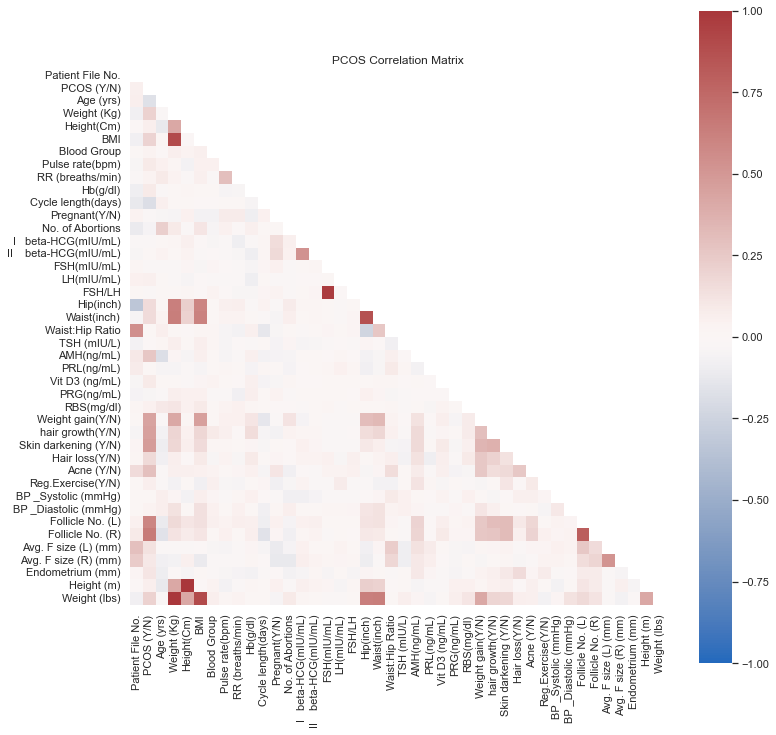

In [308]:
coorelation_matrix = PCOS_woinf.corr().round(2)
mask = np.triu(np.ones_like(coorelation_matrix))
plt.subplots(figsize = (12, 12))
sns.heatmap(coorelation_matrix, vmax = 1, vmin = -1, cmap = "vlag", square = True, mask = mask).set(title = "PCOS Correlation Matrix")

Because the matrix is so large, it is difficult to see what features are coorelated with other features. Just from the heat map above, we can make a couple of observations:

- Follicles in the left and right overaries and symptoms such as skin darkening, hair growth and weight gain are highly correlated with PCOS. 
- We can validate these correlation values with what the research has told us so far. PCOS patients are more likely to have a number of follicles that likely will not mature and therefore will prevent the pateint from ovulating or having a 'regular' cycle. 
- Skin darkening, hair growth and weight gain are all symptoms that are most frequent in PCOS patients due to over production of male linked hormones. 

Next Steps:
- Drop variables that have a value of 0.7 or more for further analysis in a two-way ANOVA.
- Because `Weight (Kg)` and `Weight (lbs)` and `BMI` are corrrelated at .90, I will drop `Weight (Kg)` and `Weight (lbs)` from the two-way ANOVA to prevent duplicating highly correlated variables.
- Dropping `Follicle (L)` since it's highly correlated at .80 with `Follicle (R)`.
- Dropping `FSH/LH` as it's highly correlated with `FSH(mIU/mL)`. 
- Dropping `Hip(inch)` as it's highly correlated with `Waist(inch)`. 
- Dropping `Height (cm)` as it's highly correlated with `Height (m)`.

In [291]:
coorelation_matrix_filtered = coorelation_matrix.unstack()
coorelation_matrix_filtered = coorelation_matrix_filtered[abs(coorelation_matrix_filtered) >= 0.7]

print(coorelation_matrix_filtered)

Patient File No.        Patient File No.          1.00
PCOS (Y/N)              PCOS (Y/N)                1.00
Age (yrs)               Age (yrs)                 1.00
Weight (Kg)             Weight (Kg)               1.00
                        BMI                       0.90
                        Weight (lbs)              1.00
Height(Cm)              Height(Cm)                1.00
                        Height (m)                1.00
BMI                     Weight (Kg)               0.90
                        BMI                       1.00
                        Weight (lbs)              0.90
Blood Group             Blood Group               1.00
Pulse rate(bpm)         Pulse rate(bpm)           1.00
RR (breaths/min)        RR (breaths/min)          1.00
Hb(g/dl)                Hb(g/dl)                  1.00
Cycle length(days)      Cycle length(days)        1.00
Pregnant(Y/N)           Pregnant(Y/N)             1.00
No. of Abortions        No. of Abortions          1.00
I   beta-H

Created a new DataFrame `PCOS_woinf_ANOVA` dropping all columns that were noted above due to correlation value of 0.7 or more and categorical (other than `PCOS (Y/N)`) for one-way ANOVA analysis.

In [322]:
PCOS_woinf_ANOVA = PCOS_woinf[['PCOS (Y/N)', 'Age (yrs)', 'BMI', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle length(days)',
       'No. of Abortions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Height (m)']]

In [323]:
PCOS_woinf_ANOVA = PCOS_woinf_ANOVA.rename(columns = {'PCOS (Y/N)': "PCOS", 'Age (yrs)': "Age", 'Pulse rate(bpm)': "Pulse_Rate", 'RR (breaths/min)': "Resp_Rate", 'Hb(g/dl)': "Hemoglobin", 'Cycle length(days)' : "Cycle_Length", 'No. of Abortions': "Num_Abortions", 'I   beta-HCG(mIU/mL)': "HCG_Read_1", 'II    beta-HCG(mIU/mL)': "HCG_Read_2", 'FSH(mIU/mL)': "Follicle_Stim_Horm", 'LH(mIU/mL)': "Luteninizing_Horm", 'Waist(inch)': "Waist_in", 'Waist:Hip Ratio': "Waist_Hip_Ratio", 'TSH (mIU/L)': "Thyroid_Horm", 'AMH(ng/mL)': "Anti_Mull_Horm", 'PRL(ng/mL)': "Prolactin", 'Vit D3 (ng/mL)': "Vit_D", 'PRG(ng/mL)': "Progesterone", 'RBS(mg/dl)': "Random_Blood_Sug", 'BP _Systolic (mmHg)': "Systolic", 'BP _Diastolic (mmHg)': "Diastolic", 'Follicle No. (R)': "Foll_No_R", 'Avg. F size (L) (mm)': "Avg_Foll_Size_L", 'Avg. F size (R) (mm)': "Avg_Foll_Size_R", 'Endometrium (mm)': "Endometrium", 'Height (m)' :"Height_m"})

In [324]:
PCOS_woinf_ANOVA.columns

Index(['PCOS', 'Age', 'BMI', 'Pulse_Rate', 'Resp_Rate', 'Hemoglobin',
       'Cycle_Length', 'Num_Abortions', 'HCG_Read_1', 'HCG_Read_2',
       'Follicle_Stim_Horm', 'Luteninizing_Horm', 'Waist_in',
       'Waist_Hip_Ratio', 'Thyroid_Horm', 'Anti_Mull_Horm', 'Prolactin',
       'Vit_D', 'Progesterone', 'Random_Blood_Sug', 'Systolic', 'Diastolic',
       'Foll_No_R', 'Avg_Foll_Size_L', 'Avg_Foll_Size_R', 'Endometrium',
       'Height_m'],
      dtype='object')

### Hypothesis Testing

My null hypothesis is that the mean of each variable is equal to the same mean of that variable to patients that have PCOS. I will set my significance level to 0.05 so that I can be 95% confident in my conclusion and accept 5% error that my conclusions are incorrect.

- $H_0$: $\mu_{PCOS_{β}}$ = $\mu_{non-PCOS_{β}}$

- $H_a$: $\mu_{PCOS_{β}}$ $\neq$ $\mu_{non-PCOS_{β}}$

_Where ${β}$ is equal to the each independent variable or feature in the dataset._

If the probability of observing the average of that variable is extreme or as extreme as the one we observed in our dataset, given that our hypothesis is true is higher than the significance level (0.05) then we fail to reject the null hypothesis. 

- If the $p-value$ is higher than 0.05, we lack sufficient statistical evidence to assume that the variable we are observing would be correlated with a PCOS diagnosis. 
- If the $p-value$ is lower than 0.05, we would reject H0 in favor of Ha, meaning that we have enough statistical evidence to assume that particular variable is NOT correlated with a PCOS diagnosis.

In [181]:
pg.anova(dv = 'PCOS', between = ['Age'], data = PCOS_woinf_ANOVA).round(3)
#0.007 < 0.05, reject H0 in favor of Ha. We have enough statistical \
#evidence to assume that age is NOT correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Age,28,512,1.813,0.007,0.09


In [182]:
pg.anova(dv = 'PCOS', between = ['BMI'], data = PCOS_woinf_ANOVA).round(3)
#0.086 > 0.05, retain H0. BMI is correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,BMI,386,154,1.209,0.086,0.752


In [184]:
pg.anova(dv = 'PCOS', between = ['Pulse_Rate'], data = PCOS_woinf_ANOVA).round(3)
#0.393 > 0.05, retain H0. Pulse rate is correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Pulse_Rate,10,530,1.058,0.393,0.02


In [185]:
pg.anova(dv = 'PCOS', between = ['Resp_Rate'], data = PCOS_woinf_ANOVA).round(3)
#0.21 > 0.05, retain H0. Respirtory rate is correlated with a PCOS diagnosis..

,Source,ddof1,ddof2,F,p-unc,np2
0,Resp_Rate,7,533,1.383,0.21,0.018


In [186]:
pg.anova(dv = 'PCOS', between = ['Hemoglobin'], data = PCOS_woinf_ANOVA).round(3)
#0.243 > 0.05, retain H0. Hemoglobin is correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Hemoglobin,45,495,1.147,0.243,0.094


In [187]:
pg.anova(dv = 'PCOS', between = ['Cycle_Length'], data = PCOS_woinf_ANOVA).round(3)
#0.0 < 0.05, reject H0 in favor of Ha. We have enough statistical \
#evidence to assume that Cycle length is NOT correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Cycle_Length,11,529,10.369,0.0,0.177


In [188]:
pg.anova(dv = 'PCOS', between = ['Num_Abortions'], data = PCOS_woinf_ANOVA).round(3)
#0.544 > 0.05, retain H0. Number of abortions is correlated with a PCOS diagnosis. 

,Source,ddof1,ddof2,F,p-unc,np2
0,Num_Abortions,5,535,0.808,0.544,0.007


In [189]:
pg.anova(dv = 'PCOS', between = ['HCG_Read_1'], data = PCOS_woinf_ANOVA).round(3)
#0.059 > 0.05, retain H0. HCG is correlated with a PCOS diagnosis. 

,Source,ddof1,ddof2,F,p-unc,np2
0,HCG_Read_1,306,234,1.214,0.059,0.614


In [190]:
pg.anova(dv = 'PCOS', between = ['HCG_Read_2'], data = PCOS_woinf_ANOVA).round(3)
#0.238 > 0.05, retain H0. Confirming HCG is correlated with a PCOS diagnosis. 

,Source,ddof1,ddof2,F,p-unc,np2
0,HCG_Read_2,201,339,1.092,0.238,0.393


In [191]:
pg.anova(dv = 'PCOS', between = ['Follicle_Stim_Horm'], data = PCOS_woinf_ANOVA).round(3)
#0.022 < 0.05, reject H0 in favor of Ha. We have enough statistical \
#evidence to assume that follicle stimulating hormone is NOT correlated with a PCOS diagnosis

,Source,ddof1,ddof2,F,p-unc,np2
0,Follicle_Stim_Horm,370,170,1.31,0.022,0.74


In [192]:
pg.anova(dv = 'PCOS', between = ['Luteninizing_Horm'], data = PCOS_woinf_ANOVA).round(3)
#0.133 > 0.05, retain H0. The Luteninzing Hormone is correlated with a PCOS diagnosis. 

,Source,ddof1,ddof2,F,p-unc,np2
0,Luteninizing_Horm,341,199,1.153,0.133,0.664


In [193]:
pg.anova(dv = 'PCOS', between = ['Waist_in'], data = PCOS_woinf_ANOVA).round(3)
#0.003 < 0.05, reject H0 in favor of Ha. We have enough statistical \
#evidence to assume that Waist measurement is NOT correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Waist_in,22,518,2.105,0.003,0.082


In [194]:
pg.anova(dv = 'PCOS', between = ['Waist_Hip_Ratio'], data = PCOS_woinf_ANOVA).round(3)
#0.029 < 0.05, reject H0 in favor of Ha. We have enough statistical \
#evidence to assume that Waist:Hip Ratio is NOT correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Waist_Hip_Ratio,91,449,1.342,0.029,0.214


In [195]:
pg.anova(dv = 'PCOS', between = ['Thyroid_Horm'], data = PCOS_woinf_ANOVA).round(3)
#0.23 > 0.05, retain H0. The Luteninzing Hormone is correlated with a PCOS diagnosis. 

,Source,ddof1,ddof2,F,p-unc,np2
0,Thyroid_Horm,307,233,1.096,0.23,0.591


In [196]:
pg.anova(dv = 'PCOS', between = ['Anti_Mull_Horm'], data = PCOS_woinf_ANOVA).round(3)
#0.0 < 0.05, reject H0 in favor of Ha. We have enough statistical \
#evidence to assume that Anti-Mullarian Hormone is NOT correlated with a PCOS diagnosis. 

,Source,ddof1,ddof2,F,p-unc,np2
0,Anti_Mull_Horm,300,240,1.631,0.0,0.671


In [197]:
pg.anova(dv = 'PCOS', between = ['Prolactin'], data = PCOS_woinf_ANOVA).round(3)
#0.011 < 0.05, reject H0 in favor of Ha. We have enough statistical \
#evidence to assume that Prolactin is NOT correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Prolactin,480,60,1.626,0.011,0.929


In [198]:
pg.anova(dv = 'PCOS', between = ['Vit_D'], data = PCOS_woinf_ANOVA).round(3)
#0.1 > 0.05, retain H0. Vitamin D is correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Vit_D,330,210,1.177,0.1,0.649


In [200]:
pg.anova(dv = 'PCOS', between = ['Random_Blood_Sug'], data = PCOS_woinf_ANOVA).round(3)
#0.483 > 0.05, retain H0. Random Blood Sugar is correlated with a PCOS diagnosis. 

,Source,ddof1,ddof2,F,p-unc,np2
0,Random_Blood_Sug,54,486,0.998,0.483,0.1


In [201]:
pg.anova(dv = 'PCOS', between = ['Progesterone'], data = PCOS_woinf_ANOVA).round(3)
#0.466 > 0.05, retain H0. Progesterone is correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Progesterone,88,452,1.008,0.466,0.164


In [202]:
pg.anova(dv = 'PCOS', between = ['Systolic'], data = PCOS_woinf_ANOVA).round(3)
#0.886 > 0.05, retain H0. Systolic blood pressure is correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Systolic,5,535,0.344,0.886,0.003


In [203]:
pg.anova(dv = 'PCOS', between = ['Diastolic'], data = PCOS_woinf_ANOVA).round(3)
#0.754 > 0.05, retain H0. Diastolic blood pressure is correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Diastolic,4,536,0.475,0.754,0.004


In [204]:
pg.anova(dv = 'PCOS', between = ['Foll_No_R'], data = PCOS_woinf_ANOVA).round(3)
#0.0 < 0.05, reject H0 in favor of Ha. We have enough statistical \
#evidence to assume that Follicle Count in the right ovary is NOT correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Foll_No_R,19,521,24.373,0.0,0.471


In [205]:
pg.anova(dv = 'PCOS', between = ['Avg_Foll_Size_L'], data = PCOS_woinf_ANOVA).round(3)
#0.17 > 0.05, retain H0. Avg follicle size in the left ovary does impact PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Avg_Foll_Size_L,30,510,1.253,0.17,0.069


In [206]:
pg.anova(dv = 'PCOS', between = ['Avg_Foll_Size_R'], data = PCOS_woinf_ANOVA).round(3)
#0.611 > 0.05, retain H0. Avg follicle size in the right ovary is correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Avg_Foll_Size_R,31,509,0.909,0.611,0.052


In [207]:
pg.anova(dv = 'PCOS', between = ['Endometrium'], data = PCOS_woinf_ANOVA).round(3)
#0.435 > 0.05, retain H0. Endometrium lining measurement is correlated with a PCOS diagnosis. 

,Source,ddof1,ddof2,F,p-unc,np2
0,Endometrium,90,450,1.021,0.435,0.17


In [209]:
pg.anova(dv = 'PCOS', between = ['Height_m'], data = PCOS_woinf_ANOVA).round(3)
#0.6 > 0.05, retain H0. Height is correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Height_m,49,491,0.936,0.6,0.085


In [325]:
corr_pvals = { 'Features': ['BMI', 'Pulse_Rate', 'Resp_Rate', 'Hemoglobin', 'Num_Abortions', 
                          'HCG_Read_1', 'HCG_Read_2', 'Luteninizing_Horm','Thyroid_Horm', 'Vit_D','Progesterone', 
                          'Random_Blood_Sug', 'Systolic', 'Diastolic', 'Avg_Foll_Size_L', 'Avg_Foll_Size_R', 
                          'Endometrium', 'Height_m'],
            'P-Values': [0.086, 0.393, 0.21, 0.243, 0.544, 0.059,
                        0.238, 0.133, 0.23, 0.1, 0.466, 0.483, 0.886, 0.754, 0.17, 0.611, 0.435, 0.6]}

In [326]:
corr_pvals_df = pd.DataFrame.from_dict(corr_pvals)
corr_pvals_df = corr_pvals_df.sort_values(by = 'P-Values', ascending = False)

[Text(0.5, 1.0, 'P-Values of PCOS Correlated Features')]

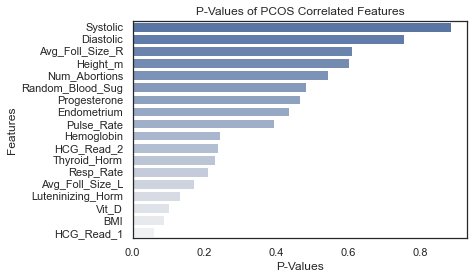

In [327]:
sns.barplot(x = "P-Values", y = "Features", data = corr_pvals_df, orient = "h", palette = "light:b_r").set(title = 'P-Values of PCOS Correlated Features')

[Text(0.5, 1.0, 'Systolic Blood Pressure Box Plots')]

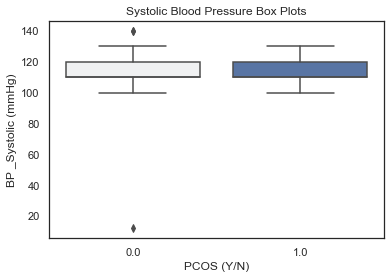

In [329]:
sns.boxplot(data = PCOS_woinf, y = "BP _Systolic (mmHg)", x = "PCOS (Y/N)", palette = "light:b").set(title = "Systolic Blood Pressure Box Plots")

In [315]:
PCOS_woinf.columns

Index(['Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle length(days)', 'Pregnant(Y/N)',
       'No. of Abortions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Acne (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Height (m)', 'Weight (lbs)', 'Blood Type (str)',
       'Blood Pressure (str)'],
      dtype='object')

In [321]:
#COME BACK TO ME

symptoms = pd.crosstab(index = PCOS_woinf["PCOS (Y/N)"], columns = PCOS_woinf['Weight gain(Y/N)'])
symptoms

Weight gain(Y/N),False,True
PCOS (Y/N),,
0.0,281,83
1.0,56,121


## Explanatory Data Analysis

Summarize analysis. Describe outcomes of the analysis and next steps. How would you take this analysis further? How can this analysis be applied to different industries and business problems?

### Additional EDA

 - For additional analysis, I created a DataFrame `PCOS_outiers_removed` to remove outliers.
 - Since we cannot safely assume that all of our data is normal, I chose to leave the outliers in as it's already a small data set.
 - Code and DataFrame defined below if you would like to take a look at the various plots using the DataFrame with outliers removed.

In [ ]:
constraints = PCOS_woinf.select_dtypes(include = [np.number]).apply(lambda x: np.abs(stats.zscore(x)) < 3, result_type = 'expand').all(axis = 1)
PCOS_outliers_removed = PCOS_woinf.drop(PCOS_woinf.index[~constraints], inplace = False)
PCOS_outliers_removed.shape

Because Weight Gain is associated with a high Random Blood Sugar (RBS), I chose to compare the spread or distribution of those values side by side with PCOS and non-PCOS patients.

Observations:

 - From the histrograms below, it looks like patients without PCOS have higher RBS levels vs. the PCOS patients.
 - This distribution of the non-PCOS patients look normally distributed and PCOS pateints look more uniform.
 - This is counter to our original hypothesis. 

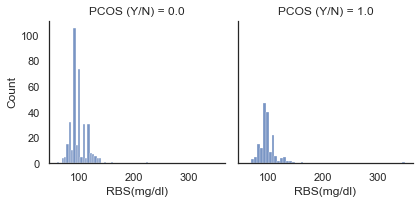

In [297]:
g = sns.FacetGrid(PCOS_woinf, col="PCOS (Y/N)")
g.map(sns.histplot, "RBS(mg/dl)")

To see if there is any relationship between weight and Random Blood Sugar and PCOS pateints, I chose to do a scatter plot. From the scatter plot below, it does not there is any relationship between BMI and Random Blood Sugar values.  

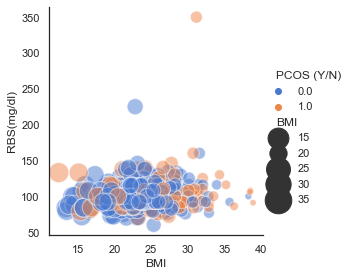

In [298]:
sns.relplot(x = "BMI", y = "RBS(mg/dl)", hue = "PCOS (Y/N)", size = "BMI",
           sizes = (400, 40), alpha = .5, palette = "muted", height = 4, data = PCOS_woinf)

<AxesSubplot:xlabel='Weight (lbs)', ylabel='RBS(mg/dl)'>

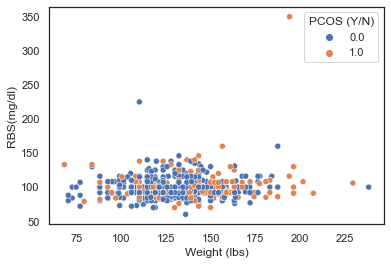

In [299]:
sns.scatterplot(data = PCOS_woinf, x = "Weight (lbs)", y = "RBS(mg/dl)", hue = "PCOS (Y/N)")

<AxesSubplot:xlabel='RBS(mg/dl)'>

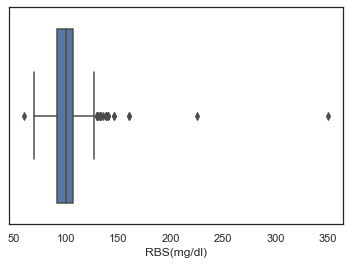

In [300]:
sns.boxplot(data = PCOS_woinf, x = "RBS(mg/dl)", hue = "PCOS (Y/N)")

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='RBS(mg/dl)'>

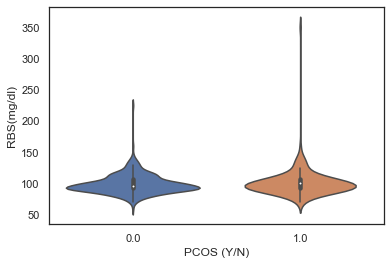

In [301]:
sns.violinplot(data = PCOS_woinf, y = "RBS(mg/dl)", x = "PCOS (Y/N)")

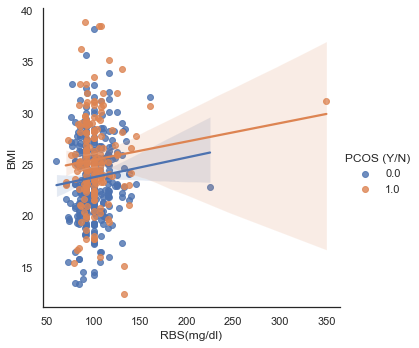

In [302]:
sns.lmplot(data = PCOS_woinf, x = "RBS(mg/dl)", y = "BMI", hue = "PCOS (Y/N)")

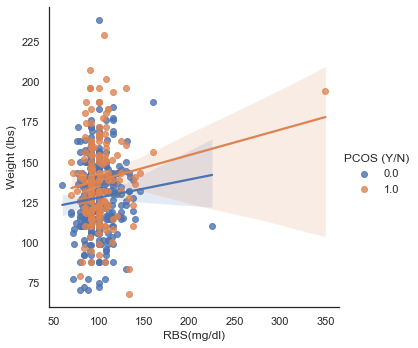

In [303]:
sns.lmplot(data = PCOS_woinf, x = "RBS(mg/dl)", y = "Weight (lbs)", hue = "PCOS (Y/N)")

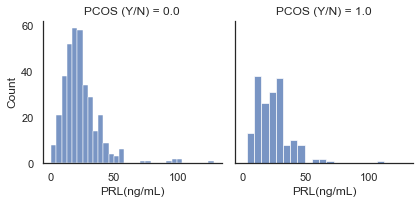

In [305]:
g = sns.FacetGrid(PCOS_woinf, col="PCOS (Y/N)")
g.map(sns.histplot, "PRL(ng/mL)")

Going back to the first question, are there any features that are correlated with PCOS pateints? In order to analyze this, we need to compare categorical groups (PCOS or not, Pregnant or not) with hormones that are related to PCOS. In our data set, that is raised levels of `LH` and `PRL`. Let's start there. 

In order to conduct an Analysis of Variance (ANOVA), we need to follow the test assumptions:

- Population distributions are normal. We can't be sure about this one, but for analysis purposes, let's assume this is true. 
- The characteristics that we are testing for are independent variables.
- Samples have equal variances. Let's test this out first. 

In [306]:
rp.summary_cont(PCOS_woinf["PRL(ng/mL)"].groupby(PCOS_woinf["PCOS (Y/N)"]))

,N,Mean,SD,SE,95% Conf.,Interval
PCOS (Y/N),,,,,,
0.0,364,24.2679,15.4881,0.8118,22.6714,25.8643
1.0,177,24.4318,13.8868,1.0438,22.3718,26.4918


In [307]:
rp.summary_cont(PCOS_woinf["LH(mIU/mL)"].groupby(PCOS_woinf["PCOS (Y/N)"]))

,N,Mean,SD,SE,95% Conf.,Interval
PCOS (Y/N),,,,,,
0.0,364,2.6127,2.1036,0.1103,2.3959,2.8295
1.0,177,14.4023,151.4786,11.3858,-8.0680,36.8727


In [ ]:
stats.f_oneway(PCOS_woinf["PRL(ng/mL)"][PCOS_woinf["PCOS (Y/N)"] == True],
               PCOS_woinf["PRL(ng/mL)"][PCOS_woinf["PCOS (Y/N)"] == False])

 - https://www.cdc.gov/diabetes/basics/pcos.html#:~:text=What%20is%20PCOS%3F,US%20women%20of%20reproductive%20age.
 
 - https://www.mayoclinic.org/diseases-conditions/pcos/symptoms-causes/syc-20353439?p=1
 
 - https://medlineplus.gov/polycysticovarysyndrome.html 